In [ ]:
! pip install scikit-learn
! pip numpy
! pip pandas
! pip matplotlib

In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as skpreprocess
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from google.colab import files
from sklearn.metrics import mean_absolute_error, r2_score
from matplotlib import pyplot as plt

## DATA Uploading

In [2]:
uploaded1 = files.upload()
file_name1 = list(uploaded1.keys())[0]


Saving lag3_per_df_clean_nomissing.csv to lag3_per_df_clean_nomissing.csv


In [3]:
uploaded2 = files.upload()
file_name2 = list(uploaded2.keys())[0]

Saving lag4_per_df_clean_nomissing.csv to lag4_per_df_clean_nomissing.csv


In [4]:
uploaded3 = files.upload()
file_name3 = list(uploaded3.keys())[0]

Saving lag5_per_df_clean_nomissing.csv to lag5_per_df_clean_nomissing.csv


In [5]:
#read data with pandas dataframe
data1=pd.read_csv(file_name1)
data2=pd.read_csv(file_name2)
data3=pd.read_csv(file_name3)

In [6]:
#create list of three lagged dataset
dataset=[]
dataset.append(data1)
dataset.append(data2)
dataset.append(data3)

In [38]:
# sorted datast based on years
for data in dataset:
  data.sort_values('Year', ignore_index = True, inplace = True)
  data=data.drop(columns='diff1')
  display(data)

,Year,DeathRatePer100K,Population,GDP,GDPPerCapita,InflationRate,EmploymentPopulationRatio,RegionCode1,RegionCode2,RegionCode3,...,Country2,Country3,Country4,Country5,Country6,Country7,lag1,lag2,lag3,diff
0,1995,5.616998,3187784.0,2.392765e+09,750.604449,7.793219,53.186,0,0,0,...,0,0,0,0,0,0,3.260952,4.623257,2.950949,2.356047
1,1995,86.593288,148375787.0,3.960000e+11,2665.779785,197.414268,55.614,0,0,0,...,1,0,1,0,1,0,87.999825,79.761095,64.773864,-1.406537
2,1995,86.787685,1436634.0,4.502971e+09,3134.389753,28.776614,55.871,0,0,0,...,0,0,0,1,0,0,88.288854,81.048257,67.376279,-1.501170
3,1995,24.130412,3524506.0,8.781254e+10,24914.850700,1.720534,62.116,0,0,0,...,1,0,1,0,1,0,21.328791,18.555700,19.411815,2.801622
4,1995,16.289283,39724050.0,6.150000e+11,15471.962720,4.673803,38.593,0,0,0,...,1,0,0,1,0,0,16.386833,15.709042,14.442144,-0.097549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,2022,19.059343,382003.0,2.806453e+10,73466.778670,8.308755,71.487,0,0,0,...,1,1,0,1,0,0,20.221005,25.426728,21.292335,-1.161662
1828,2022,10.191523,3712502.0,2.478079e+10,6674.956960,11.898165,55.586,0,0,0,...,1,0,0,1,0,0,9.883029,11.142417,14.423351,0.308494
1829,2022,23.433631,6664449.0,6.356340e+10,9537.682867,11.981512,54.011,0,0,0,...,0,1,1,0,1,0,26.179659,26.314726,27.451073,-2.746027
1830,2022,18.784608,38929902.0,2.160000e+12,55522.445690,6.802801,61.568,0,1,0,...,0,0,1,0,0,0,19.872882,22.083935,24.588131,-1.088274


,Year,DeathRatePer100K,Population,GDP,GDPPerCapita,InflationRate,EmploymentPopulationRatio,RegionCode1,RegionCode2,RegionCode3,...,Country2,Country3,Country4,Country5,Country6,Country7,lag1,lag2,lag3,lag4
0,1996,5.614361,3168033.0,3.199641e+09,1009.977111,12.725478,53.039,0,0,0,...,0,0,0,0,0,0,5.616998,3.260952,4.623257,2.950949
1,1996,25.349322,22619004.0,3.693707e+10,1633.010644,38.829301,60.432,0,0,0,...,1,0,1,0,1,0,24.927009,25.686384,24.638829,23.488126
2,1996,45.488611,4557097.0,2.414753e+10,5298.885080,4.300000,49.117,0,0,0,...,1,0,1,0,0,0,39.572111,46.270910,46.189070,49.122236
3,1996,6.690599,10608800.0,1.460000e+11,13749.115110,8.194552,46.274,0,0,0,...,1,0,0,1,0,0,7.004734,6.770511,7.919838,6.822389
4,1996,14.323086,58166950.0,1.420000e+12,24406.400300,2.851782,56.638,0,0,0,...,0,1,0,1,0,0,14.904162,15.190037,15.529940,16.164577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,2022,23.433631,6664449.0,6.356340e+10,9537.682867,11.981512,54.011,0,0,0,...,0,1,1,0,1,0,26.179659,26.314726,27.451073,27.560894
1731,2022,19.059343,382003.0,2.806453e+10,73466.778670,8.308755,71.487,0,0,0,...,1,1,0,1,0,0,20.221005,25.426728,21.292335,18.990095
1732,2022,21.727175,17700982.0,1.010000e+12,57025.012460,10.001208,63.118,0,0,0,...,0,0,0,0,1,0,21.315689,20.872615,20.800716,21.179450
1733,2022,3.270637,2780469.0,1.951347e+10,7018.051504,8.640911,56.548,0,0,0,...,0,0,0,0,0,0,3.708297,2.885473,3.456665,4.105286


,Year,DeathRatePer100K,Population,GDP,GDPPerCapita,InflationRate,EmploymentPopulationRatio,RegionCode1,RegionCode2,RegionCode3,...,Country3,Country4,Country5,Country6,Country7,lag1,lag2,lag3,lag4,lag5
0,1997,10.679622,3148281.0,2.258514e+09,717.380048,33.180274,51.873,0,0,0,...,0,0,0,0,0,5.614361,5.616998,3.260952,4.623257,2.950949
1,1997,52.218423,5139835.0,1.270000e+11,24691.872810,1.192559,51.107,0,0,0,...,0,0,1,0,0,49.389271,55.181845,55.372148,56.072526,58.561873
2,1997,23.834032,5383291.0,2.770603e+10,5146.671078,6.141990,52.575,0,0,0,...,1,1,0,1,0,25.477442,27.892832,26.318219,28.221348,30.496964
3,1997,38.488678,59969944.0,1.450000e+12,24226.884690,1.203943,48.480,0,0,0,...,0,0,1,0,0,39.125122,41.171259,42.134838,43.019620,41.092117
4,1997,14.194017,58316954.0,1.560000e+12,26766.005620,2.201143,57.486,0,0,0,...,1,0,1,0,0,14.323086,14.904162,15.190037,15.529940,16.164577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,2022,19.059343,382003.0,2.806453e+10,73466.778670,8.308755,71.487,0,0,0,...,1,0,1,0,0,20.221005,25.426728,21.292335,18.990095,19.540264
1638,2022,3.270637,2780469.0,1.951347e+10,7018.051504,8.640911,56.548,0,0,0,...,0,0,0,0,0,3.708297,2.885473,3.456665,4.105286,3.148083
1639,2022,17.228853,1262523.0,1.294873e+10,10256.230310,10.773751,51.692,0,1,0,...,1,1,1,0,0,21.023025,21.506443,19.430174,17.002488,17.443884
1640,2022,18.293218,5637022.0,4.670000e+11,82807.629060,6.121060,68.694,0,0,0,...,0,1,0,1,0,15.611850,17.913913,16.121477,16.876097,15.577603


# Modeling
## Loss Function and Evaluation Metrics

* Mean Square Error (MSE): Loss function

$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
* R^2:  


$$1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$
* Mean Absolute Error(MAE)

$$ \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

## Regular Polynominal Regression
The difference between obsevration in current year and previous year ($ \Delta y$) is included as target variables:
$$ \Delta y = y_{\text{currnt year}} - y_{\text{previous year}}$$


In [29]:
# create difference between current year and previous year
data1['diff']=data1['DeathRatePer100K'] - data1['lag1']

In [42]:
# drop lag features
print(data1.columns)
no_lag_data= data1.drop(columns=['lag1', 'lag2', 'lag3', 'diff1'])
print(no_lag_data.columns)

Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionCode3', 'Religion1', 'Religion2', 'Country1',
       'Country2', 'Country3', 'Country4', 'Country5', 'Country6', 'Country7',
       'lag1', 'lag2', 'lag3', 'diff', 'diff1'],
      dtype='object')
Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionCode3', 'Religion1', 'Religion2', 'Country1',
       'Country2', 'Country3', 'Country4', 'Country5', 'Country6', 'Country7',
       'diff'],
      dtype='object')


In [47]:
degrees = [p for p in range(1, 6)]
# define x, and y dataset
y_no_lag = no_lag_data['diff']
X_no_lag= no_lag_data.drop(columns=['DeathRatePer100K', 'diff', 'Year'])

# training, test split
X_train, X_test, y_train, y_test = train_test_split(X_no_lag, y_no_lag, test_size=0.2, random_state=42)

# store results with dictionary
regular_linear_train_error={}
regular_linear_test_error={}

regular_linear_train_error['mse'] = []
regular_linear_train_error['mae'] = []
regular_linear_train_error['r2'] = []

regular_linear_test_error['mse'] = []
regular_linear_test_error['mae'] = []
regular_linear_test_error['r2'] = []

for degree in degrees:

    poly_transform = skpreprocess.PolynomialFeatures(degree=degree)

    # initialize sci-kit linear regression model
    X_train_poly = poly_transform.fit_transform(X_train)

    # initialize sci-kit linear regression model
    model_linear = LinearRegression()

    # train linear regression model
    model_linear.fit(X_train_poly, y_train)

    # prediction model on training set
    predictions_train = model_linear.predict(X_train_poly)

    print('Results for linear regression model with degree {} polynomial expansion'.format(degree))
    print('Traing Errors for linear regression model with degree {} polynomial expansion'.format(degree))
    train_mse = mean_squared_error(y_train, predictions_train)
    print('Training set mse: {:.4f}'.format(train_mse))

    train_r2 = r2_score(y_train, predictions_train)
    print('Training set R2: {:.4f}'.format(train_r2))

    train_mae = mean_absolute_error(y_train, predictions_train)
    print('Training set mae: {:.4f}'.format(train_mae))

    #save
    regular_linear_train_error['mse'].append(train_mse)
    regular_linear_train_error['mae'].append(train_mae)
    regular_linear_train_error['r2'].append(train_r2)

    print('Test Errors for linear regression model with degree {} polynomial expansion'.format(degree))
    X_test_poly = poly_transform.transform(X_test)
    predictions_test = model_linear.predict(X_test_poly)

    test_mse = mean_squared_error(y_test, predictions_test)
    print('Test set mse: {:.4f}'.format(test_mse))

    test_r2 = r2_score(y_test, predictions_test)
    print('Test set r2: {:.4f}'.format(test_r2))

    test_mae = mean_absolute_error(y_test, predictions_test)
    print('Test set mae: {:.4f}'.format(test_mae))

    #save
    regular_linear_test_error['mse'].append(test_mse)
    regular_linear_test_error['mae'].append(test_mae)
    regular_linear_test_error['r2'].append(test_r2)


Results for linear regression model with degree 1 polynomial expansion
Traing Errors for linear regression model with degree 1 polynomial expansion
Training set mse: 8.2934
Training set R2: 0.0176
Training set mae: 1.7921
Test Errors for linear regression model with degree 1 polynomial expansion
Test set mse: 7.5278
Test set r2: -0.0118
Test set mae: 1.8622
Results for linear regression model with degree 2 polynomial expansion
Traing Errors for linear regression model with degree 2 polynomial expansion
Training set mse: 8.3870
Training set R2: 0.0065
Training set mae: 1.8003
Test Errors for linear regression model with degree 2 polynomial expansion
Test set mse: 7.3644
Test set r2: 0.0101
Test set mae: 1.8351
Results for linear regression model with degree 3 polynomial expansion
Traing Errors for linear regression model with degree 3 polynomial expansion
Training set mse: 8.4327
Training set R2: 0.0011
Training set mae: 1.8144
Test Errors for linear regression model with degree 3 polyn

In [44]:
#help function to plot.
def plot_results(axis,
                 x_values,
                 y_values,
                 labels,
                 colors,
                 x_limits,
                 x_label,
                 y_label):

    for x, y, label, color in zip(x_values, y_values, labels, colors):
        axis.plot(x, y, marker='o', color=color, label=label)
        axis.legend(loc='best')

    # Set x and y limits
    axis.set_xlim(x_limits)
    axis.set_xticks(range(0, max(max(x_values)) + 1))


    # Set x and y labels
    axis.set_xlabel(x_label)
    axis.set_ylabel(y_label)

Text(0.5, 0.98, 'Differenced Regular Polynominal Regression with Various Degrees of Polynomial Expansions')

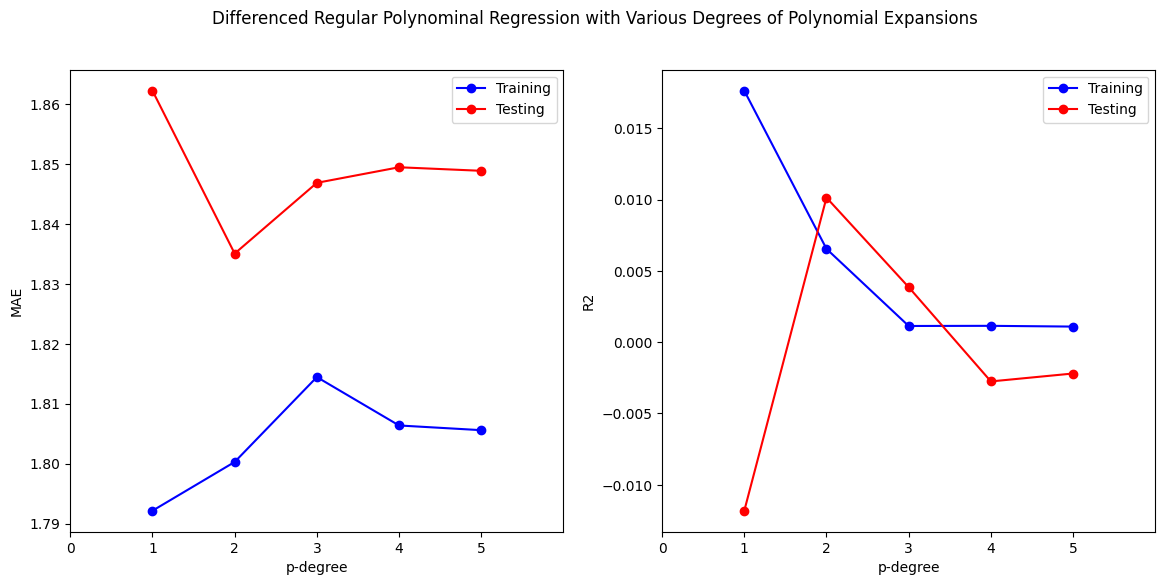

In [46]:
#plot
labels = ['Training', 'Testing']
colors = ['blue', 'red']
x_values = [degrees] * 2

mae_regular_train_errors = np.array(regular_linear_train_error['mae'])
mae_regular_test_errors = np.array(regular_linear_test_error['mae'])

r2_regular_train_errors = np.array(regular_linear_train_error['r2'])
r2_regular_test_errors = np.array(regular_linear_test_error['r2'])

mae_regular_y_values = [mae_regular_train_errors,mae_regular_test_errors]
r2_regular_y_values = [r2_regular_train_errors,r2_regular_test_errors]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

plot_results(
    axis=ax1,
    x_values=x_values,
    y_values=mae_regular_y_values,
    labels=labels,
    colors=colors,
    x_limits=[0, len(degrees)+1],
    x_label='p-degree',
    y_label='MAE')

plot_results(
    axis=ax2,
    x_values=x_values,
    y_values=r2_regular_y_values ,
    labels=labels,
    colors=colors,
    x_limits=[0, len(degrees)+1],
    x_label='p-degree',
    y_label='R2')

plt.suptitle('Differenced Regular Polynominal Regression with Various Degrees of Polynomial Expansions')

## AutoRegression: Polynominal Regression models for times series data


## Time-Series Split
 For time series data, walk-forward split methods should be applied. `sklearn.model_selection.TimeSeriesSplit()` provides the walk-forward split functionality for time series data. You can find more information about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html).


In [18]:
# five tiems cross-validation split
n_splits = 5
tscv = TimeSeriesSplit(n_splits)

In [66]:
for data in dataset:
  print(data.columns)

Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionCode3', 'Religion1', 'Religion2', 'Country1',
       'Country2', 'Country3', 'Country4', 'Country5', 'Country6', 'Country7',
       'lag1', 'lag2', 'lag3', 'diff', 'diff1'],
      dtype='object')
Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionCode3', 'Religion1', 'Religion2', 'Country1',
       'Country2', 'Country3', 'Country4', 'Country5', 'Country6', 'Country7',
       'lag1', 'lag2', 'lag3', 'lag4', 'diff1'],
      dtype='object')
Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionCode3', 'Religion1', 'Religion2', 'Country1',
       'Country2', 'Country3', 'Country4', 'Country5', 

In [130]:
base_mae_3dataset={
    'mse':[],
    'r2':[],
    'mae':[]
}


for i , data in enumerate(dataset):
  # y value: since I create difference already for the first dataset
  if i == 0:
     y_base = data['diff']
  else:
    y_base = data['DeathRatePer100K'] - data['lag1']

  # calcualte difference
  for j in range(2, i+4):
    data['diff'+str(j-1)]= data['lag'+str(j-1)] - data['lag'+str(j)]
    data = data.drop(columns=['lag'+str(j-1)])
  data = data.drop(columns=['lag'+str(i+3)])
  print(data.columns)

  # x value: since I create difference already for the first dataset
  if i == 0:
    X_base = data.drop(columns=['DeathRatePer100K', 'Year', 'diff'])
  else:
    X_base = data.drop(columns=['DeathRatePer100K', 'Year'])


  base_mae_3dataset['diff'+str(i+3)] = []
  cv_mae=[]
  cv_mse=[]
  cv_r2=[]
  for train_index, test_index in tscv.split(X_base):
    x_train_base, x_test_base = X_base.iloc[train_index], X_base.iloc[test_index]
    y_train_base, y_test_base = y_base.iloc[train_index], y_base.iloc[test_index]

    r2s=[]
    mses =[]
    maes=[]
    for j in range(1, i+3):
      lag_column = 'diff' + str(j)
      maes.append(mean_absolute_error(y_test_base, x_test_base[lag_column].values))
      mses.append(mean_squared_error(y_test_base, x_test_base[lag_column].values))
      r2s.append(r2_score(y_test_base, x_test_base[lag_column].values))
    cv_mae.append(min(maes))
    cv_mse.append(min(mses))
    cv_r2.append(max(r2s))

  average_mae_cv = np.mean(cv_mae)
  average_r2_cv = np.mean(cv_r2)
  average_mse_cv = np.mean(cv_mse)
  print(f'lag{i+3} dataset MSE Baselines : {average_mse_cv:.4f}')
  print(f'lag{i+3} dataset MAE Baselines : {average_r2_cv:.4f}')
  print(f'lag{i+3} dataset MAE Baselines : {average_mae_cv:.4f}')

  base_mae_3dataset['mse'].append(average_mse_cv)
  base_mae_3dataset['r2'].append(average_r2_cv)
  base_mae_3dataset['mae'].append(average_mae_cv)



Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionCode3', 'Religion1', 'Religion2', 'Country1',
       'Country2', 'Country3', 'Country4', 'Country5', 'Country6', 'Country7',
       'diff', 'diff1', 'diff2'],
      dtype='object')
lag3 dataset MSE Baselines : 15.2510
lag3 dataset MAE Baselines : -1.0319
lag3 dataset MAE Baselines : 2.4171
Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionCode3', 'Religion1', 'Religion2', 'Country1',
       'Country2', 'Country3', 'Country4', 'Country5', 'Country6', 'Country7',
       'diff1', 'diff2', 'diff3'],
      dtype='object')
lag4 dataset MSE Baselines : 13.7547
lag4 dataset MAE Baselines : -0.9044
lag4 dataset MAE Baselines : 2.3424
Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       

## Polynominal AutoRegression

In [23]:
results_dict_test = {}
results_dict_train = {}

degrees = [p for p in range(1, 6)]


for i , data in enumerate(dataset):
  data_key = 'lag'+str(i+3)
  results_dict_train[data_key] = {}
  results_dict_test[data_key] = {}

  # y value: since I create difference already for the first dataset
  if i == 0:
     y_poly = data['diff']
  else:
    y_pol= data['DeathRatePer100K'] - data['lag1']

  # calcualte difference
  for j in range(2, i+4):
    data['diff'+str(j-1)]= data['lag'+str(j-1)] - data['lag'+str(j)]
    data = data.drop(columns=['lag'+str(j-1)])
  data = data.drop(columns=['lag'+str(i+3)])
  print(data.columns)

  # x value: since I create difference already for the first dataset
  if i == 0:
    X_poly = data.drop(columns=['DeathRatePer100K', 'Year', 'diff'])
  else:
    X_poly = data.drop(columns=['DeathRatePer100K', 'Year'])


  for degree in degrees:
    poly_transform = skpreprocess.PolynomialFeatures(degree=degree)

    results_dict_train[data_key][degree]={
        'mse': [],
        'mae': [],
        'r2': [],
    }

    results_dict_test[data_key][degree]={
        'mse': [],
        'mae': [],
        'r2': [],

    }

    poly_mse_scores_train = []
    poly_mse_scores_test = []

    poly_r2_scores_train = []
    poly_r2_scores_test = []

    poly_mae_scores_train = []
    poly_mae_scores_test= []


    for train_index, test_index in tscv.split(X_poly):
      x_train, x_test = X_poly.iloc[train_index], X_poly.iloc[test_index]
      y_train, y_test = y_poly.iloc[train_index], y_poly.iloc[test_index]

      x_poly_train = poly_transform.fit_transform(x_train)

      # Initialize sci-kit linear regression model
      ts_model_linear = LinearRegression()

      # Train linear regression model
      ts_model_linear.fit(x_poly_train, y_train)


      #Test model on training set
      predictions_train = ts_model_linear.predict(x_poly_train)

      #calculate different types of train errors
      score_mse_linear_train = mean_squared_error(y_train, predictions_train)
      score_mae_linear_train = mean_absolute_error(y_train, predictions_train)
      score_r2_linear_train = r2_score(y_train, predictions_train)

      # Save training errors scores
      poly_mse_scores_train.append(score_mse_linear_train)
      poly_mae_scores_train.append(score_mae_linear_train)
      poly_r2_scores_train.append(score_r2_linear_train)

      # Test model on testing set
      x_poly_test = poly_transform.transform(x_test)
      predictions_test = ts_model_linear.predict(x_poly_test)

      #calculate different types of test errors
      score_mse_linear_test = mean_squared_error(y_test, predictions_test)
      score_mae_linear_test = mean_absolute_error(y_test, predictions_test)
      score_r2_linear_test = r2_score(y_test, predictions_test)


      # Save training errors scores
      poly_mse_scores_test.append(score_mse_linear_test)
      poly_mae_scores_test.append(score_mae_linear_test)
      poly_r2_scores_test.append(score_r2_linear_test)


    # Calculate the average errors across all folds

    print(f'lag{i+3} dataset for Results for linear regression model with degree {degree} polynomial expansion')

    # # training errors
    # print(f'lag{i+3} dataset for Training Results for linear regression model with degree {degree} polynomial expansion')

    # poly_average_mse_train = np.mean(poly_mse_scores_train)
    # print(f'lag{i+3} dataset Average MSE :{poly_average_mse_train:.5f}')
    # poly_average_r2_train = np.mean(poly_r2_scores_train)
    # print(f'lag{i+3} dataset Average R2 :{poly_average_r2_train:.5f}')
    # poly_average_mae_train = np.mean(poly_mae_scores_train)
    # print(f'lag{i+3} dataset Average MAE :{poly_average_mae_train:.5f}')


    #save lag dataset training error
    results_dict_train[data_key][degree]['mse'].append(poly_average_mse_train)
    results_dict_train[data_key][degree]['mae'].append(poly_average_mae_train)
    results_dict_train[data_key][degree]['r2'].append(poly_average_r2_train)


    # testing errors
    print(f'lag{i+3} dataset for Test Results for linear regression model with degree {degree} polynomial expansion')

    poly_average_mse_test= np.mean(poly_mse_scores_test)
    print(f'lag{i+3} dataset Average MSE :{poly_average_mse_test:.5f}')
    poly_average_r2_test = np.mean(poly_r2_scores_test)
    print(f'lag{i+3} dataset Average r2 :{poly_average_r2_test:.5f}')
    poly_average_mae_test = np.mean(poly_mae_scores_test)
    print(f'lag{i+3} dataset Average MAE :{poly_average_mae_test:.5f}')

    #save lag dataset testing error
    results_dict_test[data_key][degree]['mse'].append(poly_average_mse_test)
    results_dict_test[data_key][degree]['mae'].append(poly_average_mae_test)
    results_dict_test[data_key][degree]['r2'].append(poly_average_r2_test)



Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionCode3', 'Religion1', 'Religion2', 'Country1',
       'Country2', 'Country3', 'Country4', 'Country5', 'Country6', 'Country7',
       'diff', 'diff1', 'diff2'],
      dtype='object')
lag3 dataset for Results for linear regression model with degree 1 polynomial expansion
lag3 dataset for Test Results for linear regression model with degree 1 polynomial expansion
lag3 dataset Average MSE :7.43646
lag3 dataset Average r2 :0.00264
lag3 dataset Average MAE :1.78467
lag3 dataset for Results for linear regression model with degree 2 polynomial expansion
lag3 dataset for Test Results for linear regression model with degree 2 polynomial expansion
lag3 dataset Average MSE :8.08809
lag3 dataset Average r2 :-0.07724
lag3 dataset Average MAE :1.88158
lag3 dataset for Results for linear regression model with degree 3 polynomial expansi

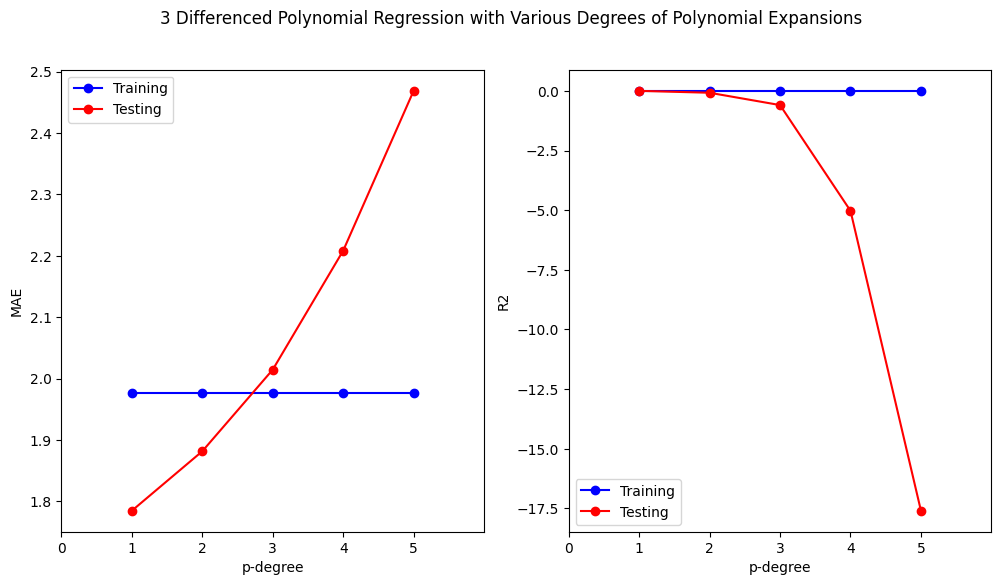

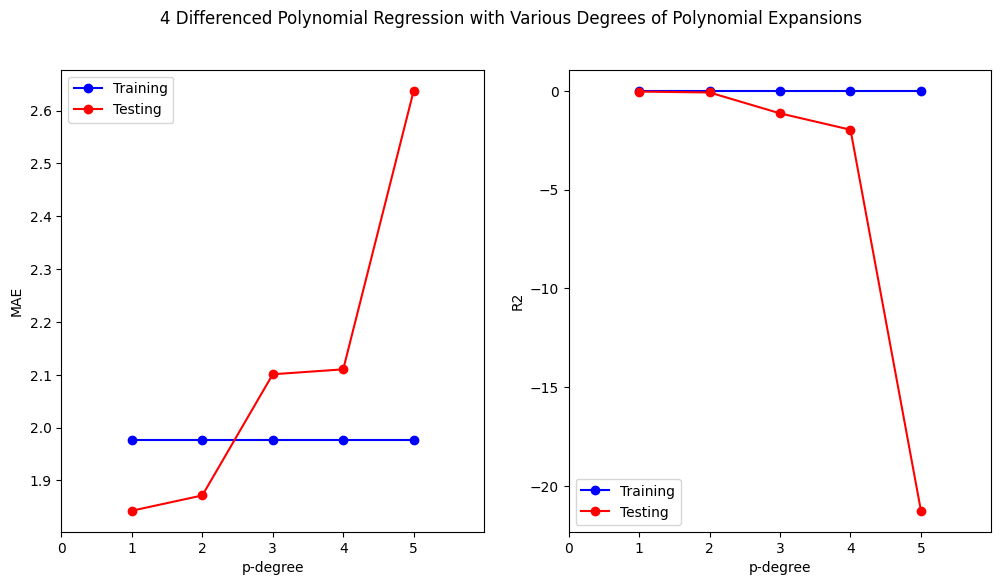

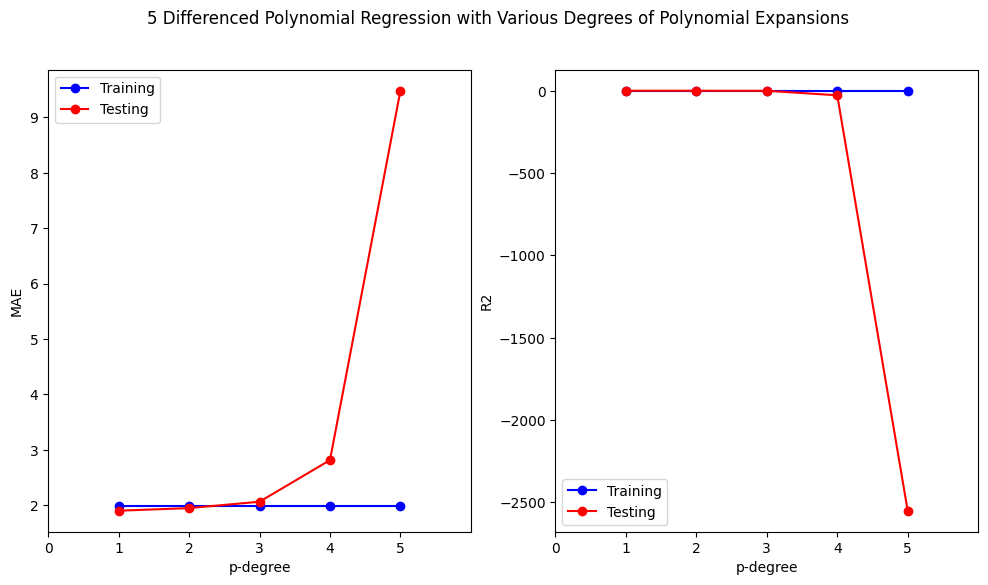

In [24]:
# create subplots for each data set to plot evaluation for training and testing
labels = ['Training', 'Testing']
colors = ['blue', 'red']
x_values = [degrees] * 2

for i in range(3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    dic_key = 'lag' + str(i+3)
    mae_train_errors = np.array([results_dict_train[dic_key][degree]['mae'] for degree in degrees])
    mae_test_errors = np.array([results_dict_test[dic_key][degree]['mae'] for degree in degrees])
    r2_train_errors = np.array([results_dict_train[dic_key][degree]['r2'] for degree in degrees])
    r2_test_errors = np.array([results_dict_test[dic_key][degree]['r2'] for degree in degrees])

    mae_y_values = [mae_train_errors, mae_test_errors]
    r2_y_values = [r2_train_errors, r2_test_errors]

    plot_results(
        axis=ax1,
        x_values=x_values,
        y_values=mae_y_values,
        labels=labels,
        colors=colors,
        x_limits=[0, len(degrees) + 1],
        x_label='p-degree',
        y_label='MAE')

    plot_results(
        axis=ax2,
        x_values=x_values,
        y_values=r2_y_values,
        labels=labels,
        colors=colors,
        x_limits=[0, len(degrees) + 1],
        x_label='p-degree',
        y_label='R2')

    ax1.legend()
    ax2.legend()
    plt.suptitle(f'{i+3} Differenced Polynomial Regression with Various Degrees of Polynomial Expansions')


### Polynominal Ridge for time series data

In [26]:
#RidgeRegression Class created for assingment
class RidgeRegression(object):

    def __init__(self):
        # Define private variables
        self.__weights = None

    def __fit_normal_equation(self, X, y, weight_decay=0):
        '''
        Fits the model to x and y via normal equation

        Arg(s):
            X : numpy
                N x d feature vector
            y : numpy
                N x 1 ground-truth label
            weight_decay : float
                weight of weight decay term
        '''

        # TODO: Implement the __fit_normal_equation function

        # TODO: Compute (X^T X)
        # X_t_X = X.T @ X
        X_t_X = np.matmul(X.T, X)

        # TODO: Create identity matrix X transpose X -> d x d
        I = np.eye(X.shape[-1])

        # TODO: Compute (X^T X + \lambda I)^-1
        X_t_X_lambda_inverse = np.linalg.inv(X_t_X + weight_decay * I)

        # Normal equation: (X^T X + \lambda I)^-1 X^T y
        self.__weights = np.matmul(np.matmul(X_t_X_lambda_inverse, X.T), y)

    def fit(self, X, y, weight_decay=0, solver='normal_equation'):
        '''
        Fits the model to x and y by solving least squares
        using normal equation

        Arg(s):
            X : numpy[float32]
                N x d feature vector
            y : numpy[float32]
                N ground-truth label
            weight_decay : float
                weight of weight decay term
            solver : str
                solver types: normal_equation
        '''

        y = np.expand_dims(y, axis=1)

        # TODO: Implement the fit function

        if solver == 'normal_equation':
            self.__fit_normal_equation(X, y, weight_decay=weight_decay)
        else:
            raise ValueError('Encountered unsupported solver: {}'.format(solver))

    def predict(self, X):
        '''
        Predicts the real value for each feature vector x

        Arg(s):
            x : numpy[float32]
                N x d feature vector
        Returns:
            numpy[float32] : N x 1 real value vector (\hat{y})
        '''

        # TODO: Implement the predict function

        # predictions = X @ self._weights
        predictions = np.matmul(X, self.__weights)
        return predictions

In [48]:
for data in dataset:
  print(data.columns)

Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionCode3', 'Religion1', 'Religion2', 'Country1',
       'Country2', 'Country3', 'Country4', 'Country5', 'Country6', 'Country7',
       'lag1', 'lag2', 'lag3', 'diff', 'diff1'],
      dtype='object')
Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionCode3', 'Religion1', 'Religion2', 'Country1',
       'Country2', 'Country3', 'Country4', 'Country5', 'Country6', 'Country7',
       'lag1', 'lag2', 'lag3', 'lag4', 'diff1'],
      dtype='object')
Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionCode3', 'Religion1', 'Religion2', 'Country1',
       'Country2', 'Country3', 'Country4', 'Country5', 

In [122]:
# alpha=1.0
weight_decays = [np.power(10, p) for p in range(0, 5)]
print(weight_decays)
degree = 1

[1, 10, 100, 1000, 10000]


In [123]:
ridge_results_dict_test = {}
ridge_results_dict_train = {}

for weight_decay in weight_decays:

  data = dataset[0]

  # y value: since I create difference already for the first dataset
  y_poly_ridge= data['diff']

  # calcualte difference
  for j in range(2, 4):
    data['diff'+str(j-1)]= data['lag'+str(j-1)] - data['lag'+str(j)]
    data = data.drop(columns=['lag'+str(j-1)])
  data = data.drop(columns=['lag'+str(3)])
  print(data.columns)

  X_poly_ridge = data.drop(columns=['DeathRatePer100K', 'Year', 'diff'])


  poly_transform = skpreprocess.PolynomialFeatures(degree=degree)

  ridge_results_dict_train[weight_decay]={
      'mse': [],
      'mae': [],
      'r2': [],
  }

  ridge_results_dict_test[weight_decay]={
      'mse': [],
      'mae': [],
      'r2': [],
  }

  ridge_mse_scores_train = []
  ridge_mse_scores_test = []

  ridge_r2_scores_train = []
  ridge_r2_scores_test = []

  ridge_mae_scores_train = []
  ridge_mae_scores_test= []


  for train_index, test_index in tscv.split(X_poly_ridge):
    x_train, x_test = X_poly_ridge.iloc[train_index], X_poly_ridge.iloc[test_index]
    y_train, y_test = y_poly_ridge.iloc[train_index], y_poly_ridge.iloc[test_index]

    x_ridge_train = poly_transform.fit_transform(x_train)

    # Initialize sci-kit linear regression model
    ts_model_ridge = RidgeRegression()

    # Train linear regression model
    ts_model_ridge.fit(x_ridge_train, y_train, weight_decay=weight_decay)


    #Test model on training set
    predictions_train = ts_model_ridge.predict(x_ridge_train)

    #calculate different types of train errors
    score_mse_linear_train = mean_squared_error(y_train, predictions_train)
    score_mae_linear_train = mean_absolute_error(y_train, predictions_train)
    score_r2_linear_train = r2_score(y_train, predictions_train)


    # Save training errors scores
    ridge_mse_scores_train.append(score_mse_linear_train)
    ridge_mae_scores_train.append(score_mae_linear_train)
    ridge_r2_scores_train.append(score_r2_linear_train)

    # Test model on testing set
    x_ridge_test = poly_transform.transform(x_test)
    predictions_test = ts_model_ridge.predict(x_ridge_test)

    #calculate different types of test errors
    score_mse_scores_test = mean_squared_error(y_test, predictions_test)
    score_mae_scores_test = mean_absolute_error(y_test, predictions_test)
    score_r2_scores_test = r2_score(y_test, predictions_test)


    # Save test errors scores
    ridge_mse_scores_test.append(score_mse_scores_test)
    ridge_mae_scores_test.append(score_mae_scores_test)
    ridge_r2_scores_test.append(score_r2_scores_test)


  # Calculate the average errors across all folds

  print(f'lag2 dataset for Results for ridge regression model with degree {degree} polynomial expansion')

  # training errors
  print(f'lag2 dataset for Training Results for ridge regression model with degree {degree} polynomial expansion')

  ridge_average_mse_train = np.mean(ridge_mse_scores_train)
  print(f'lag2 dataset Average MSE :{ridge_average_mse_train:.5f}')
  ridge_average_r2_train = np.mean(ridge_r2_scores_train)
  print(f'lag2 dataset Average R2 :{ridge_average_r2_train:.5f}')
  ridge_average_mae_train = np.mean(ridge_mae_scores_train)
  print(f'lag2 dataset Average MAE :{ridge_average_mae_train :.5f}')


  #save lag dataset training error
  ridge_results_dict_train[weight_decay]['mse'].append(ridge_average_mse_train)
  ridge_results_dict_train[weight_decay]['mae'].append(ridge_average_mae_train)
  ridge_results_dict_train[weight_decay]['r2'].append(ridge_average_r2_train)


  # testing errors
  print(f'lag2 dataset for Test Results for linear regression model with degree {degree} polynomial expansion')

  ridge_average_mse_test= np.mean(ridge_mse_scores_test)
  print(f'lag2 dataset Average MSE :{ridge_average_mse_test:.5f}')
  ridge_average_r2_test = np.mean(ridge_r2_scores_test)
  print(f'lag2 dataset Average r2 :{ridge_average_r2_test:.5f}')
  ridge_average_mae_test = np.mean(ridge_mae_scores_test)
  print(f'lag2 dataset Average MAE :{ridge_average_mae_test:.5f}')

  #save lag dataset testing error
  print(weight_decay)
  ridge_results_dict_test[weight_decay]['mse'].append(ridge_average_mse_test)
  ridge_results_dict_test[weight_decay]['mae'].append(ridge_average_mae_test)
  ridge_results_dict_test[weight_decay]['r2'].append(ridge_average_r2_test)


Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionCode3', 'Religion1', 'Religion2', 'Country1',
       'Country2', 'Country3', 'Country4', 'Country5', 'Country6', 'Country7',
       'diff', 'diff1', 'diff2'],
      dtype='object')
lag2 dataset for Results for ridge regression model with degree 1 polynomial expansion
lag2 dataset for Training Results for ridge regression model with degree 1 polynomial expansion
lag2 dataset Average MSE :9.89358
lag2 dataset Average R2 :0.04327
lag2 dataset Average MAE :1.96211
lag2 dataset for Test Results for linear regression model with degree 1 polynomial expansion
lag2 dataset Average MSE :7.31830
lag2 dataset Average r2 :0.01658
lag2 dataset Average MAE :1.77565
1
Index(['Year', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'RegionCode1',
       'RegionCode2', 'RegionC

In [125]:
labels = ['Training', 'Testing']
colors = ['blue', 'red']
x_values = [list(range(5)), list(range(5))]

In [126]:
print(x_values)
print(ridge_results_dict_train)

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]
{1: {'mse': [9.893576764896427], 'mae': [1.9621058421968087], 'r2': [0.04327248802329753]}, 10: {'mse': [9.903645014653168], 'mae': [1.9578223408959328], 'r2': [0.042409593272534615]}, 100: {'mse': [9.973614541216538], 'mae': [1.9523228605735745], 'r2': [0.036100192862797795]}, 1000: {'mse': [10.072216739541833], 'mae': [1.9600557303334516], 'r2': [0.02661747599787161]}, 10000: {'mse': [10.164756717522595], 'mae': [1.9715875117047017], 'r2': [0.0178004428827357]}}


Text(0.5, 0.98, 'Differenced Ridge Linear Regression with Various Weight Decays')

<Figure size 640x480 with 0 Axes>

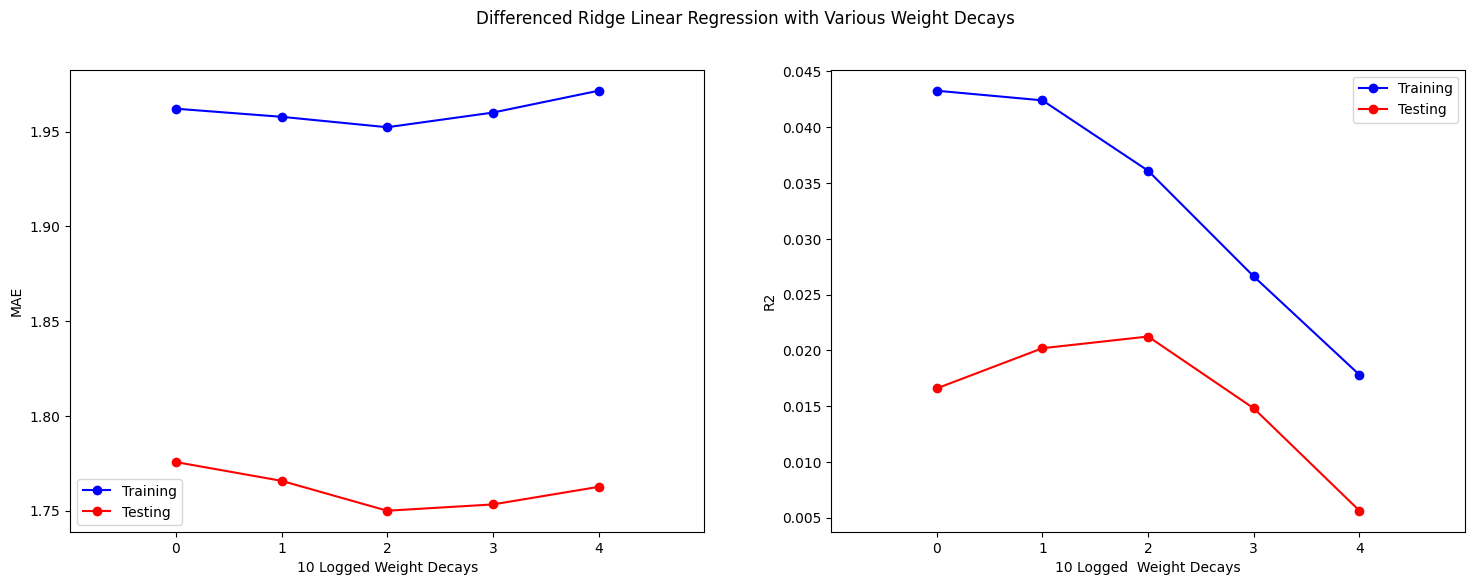

In [128]:
mae_ridge_train_errors = np.array([ridge_results_dict_train[weight_decay]['mae'] for weight_decay in weight_decays])
mae_ridge_test_errors = np.array([ridge_results_dict_test[weight_decay]['mae'] for weight_decay in weight_decays])
r2_ridge_train_errors = np.array([ridge_results_dict_train[weight_decay]['r2'] for weight_decay in weight_decays])
r2_ridge_test_errors = np.array([ridge_results_dict_test[weight_decay]['r2'] for weight_decay in weight_decays])
mae_y_values_ridge = [mae_ridge_train_errors, mae_ridge_test_errors ]
r2_y_values_ridge = [r2_ridge_train_errors, r2_ridge_test_errors ]



fig = plt.figure()  # Create a figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

plot_results(
      axis=ax1,
      x_values=x_values,
      y_values=mae_y_values_ridge,
      labels=labels,
      colors=colors,
      x_limits=[-1, max(x_values[0]) + 1],
      x_label='10 Logged Weight Decays',
      y_label='MAE')

plot_results(
    axis=ax2,
    x_values=x_values,
    y_values=r2_y_values_ridge,
    labels=labels,
    colors=colors,
    x_limits=[-1, max(x_values[0]) + 1],
    x_label='10 Logged  Weight Decays',
    y_label='R2')

ax1.legend()
ax2.legend()

plt.suptitle('Differenced Ridge Linear Regression with Various Weight Decays')

